In [58]:
# Import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
# from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns

## Random Forest Regression on Promotion Cost with customer demographics as features
### - Retraining the model by removing City & State to compare efficacy
### - RF model updated to 250 Decision Trees from 10
### - Feature Importance added to analysis 

In [12]:
file_path = 'Resources/customer_data.csv'
df = pd.read_csv(file_path)
df

,Unnamed: 0,id,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,store_city,store_state,media_type,cost,promotion_name
0,0,0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Salem,OR,"Daily Paper, Radio",126.62,Bag Stuffers
1,1,1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Salem,OR,"Daily Paper, Radio",59.86,Cash Register Lottery
2,2,2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Salem,OR,"Daily Paper, Radio",84.16,High Roller Savings
3,3,3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Salem,OR,In-Store Coupon,95.78,Cash Register Lottery
4,4,4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Salem,OR,Radio,50.79,Double Down Sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,60421,60421,S,F,2.0,High School Degree,Bronze,Professional,Y,3.0,$130K - $150K,0.0,San Francisco,CA,Cash Register Handout,127.19,Green Light Special
38888,60422,60422,S,F,1.0,Partial High School,Bronze,Skilled Manual,N,2.0,$50K - $70K,0.0,San Francisco,CA,"Sunday Paper, Radio",78.45,Unbeatable Price Savers
38889,60423,60423,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,San Francisco,CA,In-Store Coupon,95.25,You Save Days
38890,60424,60424,S,F,2.0,High School Degree,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,San Francisco,CA,Sunday Paper,69.42,Price Cutters


In [13]:
df.columns

Index(['Unnamed: 0', 'id', 'marital_status', 'gender', 'total_children',
       'education', 'member_card', 'occupation', 'houseowner',
       'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'store_city', 'store_state', 'media_type',
       'cost', 'promotion_name'],
      dtype='object')

In [14]:
customer_df = df[['marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home', 'store_city', 'store_state',
        'media_type', 'cost', 'promotion_name']].copy()
customer_df


,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,store_city,store_state,media_type,cost,promotion_name
0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Salem,OR,"Daily Paper, Radio",126.62,Bag Stuffers
1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Salem,OR,"Daily Paper, Radio",59.86,Cash Register Lottery
2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Salem,OR,"Daily Paper, Radio",84.16,High Roller Savings
3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Salem,OR,In-Store Coupon,95.78,Cash Register Lottery
4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Salem,OR,Radio,50.79,Double Down Sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,S,F,2.0,High School Degree,Bronze,Professional,Y,3.0,$130K - $150K,0.0,San Francisco,CA,Cash Register Handout,127.19,Green Light Special
38888,S,F,1.0,Partial High School,Bronze,Skilled Manual,N,2.0,$50K - $70K,0.0,San Francisco,CA,"Sunday Paper, Radio",78.45,Unbeatable Price Savers
38889,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,San Francisco,CA,In-Store Coupon,95.25,You Save Days
38890,S,F,2.0,High School Degree,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,San Francisco,CA,Sunday Paper,69.42,Price Cutters


# RF Regression with City & State

### Apply label Encoder to categorical columns

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customer_df_enc = customer_df.copy()

categ =  ['marital_status', 'gender', 'education', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'store_city',
           'store_state', 'media_type','promotion_name']

# Encode Categorical Columns

customer_df[categ] = customer_df[categ].apply(le.fit_transform)
customer_df_enc

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,store_city,store_state,media_type,cost,promotion_name
0,0,0,1.0,4,2,4,1,1.0,0,1.0,5,1,3,126.62,0
1,0,1,0.0,0,3,3,1,4.0,5,0.0,5,1,3,59.86,6
2,1,0,4.0,4,2,2,0,1.0,0,0.0,5,1,3,84.16,18
3,0,0,2.0,2,0,2,1,2.0,4,2.0,5,1,5,95.78,6
4,0,1,0.0,4,0,4,0,2.0,4,0.0,5,1,7,50.79,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,1,0,2.0,2,0,3,1,3.0,2,0.0,6,0,1,127.19,17
38888,1,0,1.0,4,0,4,0,2.0,5,0.0,6,0,10,78.45,45
38889,0,0,1.0,4,2,4,1,1.0,0,1.0,6,0,5,95.25,48
38890,1,0,2.0,2,0,4,0,2.0,4,0.0,6,0,9,69.42,24


In [24]:
customer_df_enc_1 = customer_df_enc[['marital_status', 'gender', 'total_children', 'education', 'member_card',
                                     'occupation', 'houseowner', 'avg_cars_at home(approx)', 
                                     'avg. yearly_income', 'num_children_at_home', 'store_city',
                                     'store_state', 'media_type','promotion_name', 'cost']]
customer_df_enc_1


,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,store_city,store_state,media_type,promotion_name,cost
0,0,0,1.0,4,2,4,1,1.0,0,1.0,5,1,3,0,126.62
1,0,1,0.0,0,3,3,1,4.0,5,0.0,5,1,3,6,59.86
2,1,0,4.0,4,2,2,0,1.0,0,0.0,5,1,3,18,84.16
3,0,0,2.0,2,0,2,1,2.0,4,2.0,5,1,5,6,95.78
4,0,1,0.0,4,0,4,0,2.0,4,0.0,5,1,7,11,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,1,0,2.0,2,0,3,1,3.0,2,0.0,6,0,1,17,127.19
38888,1,0,1.0,4,0,4,0,2.0,5,0.0,6,0,10,45,78.45
38889,0,0,1.0,4,2,4,1,1.0,0,1.0,6,0,5,48,95.25
38890,1,0,2.0,2,0,4,0,2.0,4,0.0,6,0,9,24,69.42


In [25]:
customer_df_enc_1.dtypes

marital_status                int64
gender                        int64
total_children              float64
education                     int64
member_card                   int64
occupation                    int64
houseowner                    int64
avg_cars_at home(approx)    float64
avg. yearly_income            int64
num_children_at_home        float64
store_city                    int64
store_state                   int64
media_type                    int64
promotion_name                int64
cost                        float64
dtype: object

In [26]:
# Split preprocessed data into our features and target arrays
X= customer_df_enc_1.drop('cost', axis =1) 
y= customer_df_enc_1['cost'] 

In [27]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)


In [28]:
# Initializing the Random Forest Regression model with 250 decision trees
model = RandomForestRegressor(n_estimators = 250, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [29]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)
y_pred

array([ 90.58,  95.74, 149.08, ..., 140.57,  59.86,  81.79])

In [30]:
from sklearn.metrics import mean_squared_error # for calculating the cost function

In [31]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 0.472


<AxesSubplot:xlabel='cost', ylabel='Predicted'>

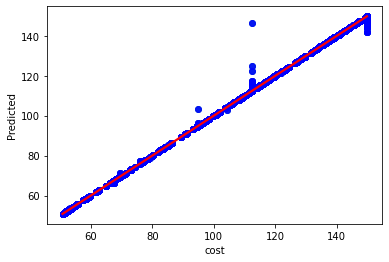

In [32]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#### Feature Importance

In [33]:
# Calculate feature importance in the Random Forest model.
importances = model.feature_importances_
importances

array([8.55202542e-05, 1.17075345e-04, 8.46370978e-04, 2.44640463e-04,
       2.28049908e-04, 5.05893100e-04, 1.81540482e-04, 3.92247006e-04,
       4.07521618e-04, 1.24229672e-04, 1.79091981e-01, 7.30062239e-02,
       1.99409456e-01, 5.45359251e-01])

In [34]:
# Sort the features by their importance.
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.5453592508521737, 'promotion_name'),
 (0.19940945573137286, 'media_type'),
 (0.17909198070309554, 'store_city'),
 (0.07300622388700197, 'store_state'),
 (0.0008463709780326428, 'total_children'),
 (0.0005058930995858739, 'occupation'),
 (0.00040752161762312104, 'avg. yearly_income'),
 (0.00039224700641772255, 'avg_cars_at home(approx)'),
 (0.0002446404630293907, 'education'),
 (0.00022804990832414078, 'member_card'),
 (0.0001815404820890472, 'houseowner'),
 (0.00012422967247138514, 'num_children_at_home'),
 (0.00011707534462364631, 'gender'),
 (8.552025415890125e-05, 'marital_status')]

# RF Regression without City & State

In [35]:
customer_df_enc_2 = customer_df_enc[['marital_status', 'gender', 'total_children', 'education', 'member_card',
                                     'occupation', 'houseowner', 'avg_cars_at home(approx)', 
                                     'avg. yearly_income', 'num_children_at_home', 'media_type','promotion_name', 'cost']]
customer_df_enc_2


,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,media_type,promotion_name,cost
0,0,0,1.0,4,2,4,1,1.0,0,1.0,3,0,126.62
1,0,1,0.0,0,3,3,1,4.0,5,0.0,3,6,59.86
2,1,0,4.0,4,2,2,0,1.0,0,0.0,3,18,84.16
3,0,0,2.0,2,0,2,1,2.0,4,2.0,5,6,95.78
4,0,1,0.0,4,0,4,0,2.0,4,0.0,7,11,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,1,0,2.0,2,0,3,1,3.0,2,0.0,1,17,127.19
38888,1,0,1.0,4,0,4,0,2.0,5,0.0,10,45,78.45
38889,0,0,1.0,4,2,4,1,1.0,0,1.0,5,48,95.25
38890,1,0,2.0,2,0,4,0,2.0,4,0.0,9,24,69.42


In [36]:
# Split preprocessed data into our features and target arrays
X= customer_df_enc_2.drop('cost', axis =1) 
y= customer_df_enc_2['cost'] 

In [37]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

In [38]:
# Initializing the Random Forest Regression model with 250 decision trees
model = RandomForestRegressor(n_estimators = 250, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [39]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)
y_pred

array([ 90.58,  95.74, 149.08, ..., 140.57,  59.86,  81.79])

In [40]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 2.645


<AxesSubplot:xlabel='cost', ylabel='Predicted'>

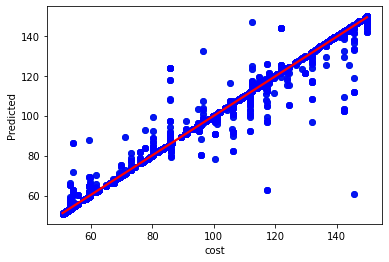

In [41]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#### Feature Importance

In [42]:
# Calculate feature importance in the Random Forest model.
importances = model.feature_importances_
importances

array([0.00308593, 0.00337253, 0.01160663, 0.00579722, 0.00476322,
       0.00799703, 0.00439273, 0.0080498 , 0.00779343, 0.0050831 ,
       0.31229522, 0.62576317])

In [43]:
# Sort the features by their importance.
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.6257631664971451, 'promotion_name'),
 (0.31229521705504965, 'media_type'),
 (0.011606630295690912, 'total_children'),
 (0.008049797381016143, 'avg_cars_at home(approx)'),
 (0.007997034755853031, 'occupation'),
 (0.007793428827112265, 'avg. yearly_income'),
 (0.005797216406137186, 'education'),
 (0.005083097335267979, 'num_children_at_home'),
 (0.0047632164227356735, 'member_card'),
 (0.00439273486984415, 'houseowner'),
 (0.003372531826875931, 'gender'),
 (0.0030859283272719096, 'marital_status')]

## Random Forest Regression on Promotion Cost with just promo name, media type, store city, & store state as features

In [44]:
customer_df_enc_3 = customer_df_enc[['store_city', 'store_state', 'media_type','promotion_name', 'cost']]

customer_df_enc_3

,store_city,store_state,media_type,promotion_name,cost
0,5,1,3,0,126.62
1,5,1,3,6,59.86
2,5,1,3,18,84.16
3,5,1,5,6,95.78
4,5,1,7,11,50.79
...,...,...,...,...,...
38887,6,0,1,17,127.19
38888,6,0,10,45,78.45
38889,6,0,5,48,95.25
38890,6,0,9,24,69.42


In [50]:
# Split preprocessed data into our features and target arrays
X= customer_df_enc_3.drop('cost', axis =1) 
y= customer_df_enc_3['cost']

In [51]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

In [52]:
# Initializing the Random Forest Regression model with 250 decision trees
model = RandomForestRegressor(n_estimators = 250, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [53]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)
y_pred

array([ 90.58,  95.74, 149.08, ..., 140.57,  59.86,  81.79])

In [54]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 1.833


<AxesSubplot:xlabel='cost', ylabel='Predicted'>

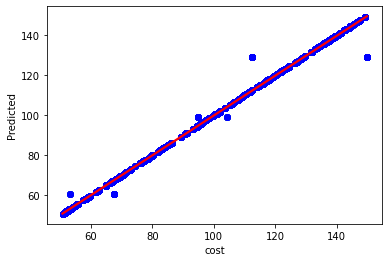

In [55]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#### Feature Importance

In [56]:
# Calculate feature importance in the Random Forest model.
importances = model.feature_importances_
importances

array([0.18015431, 0.07341565, 0.19855615, 0.5478739 ])

In [57]:
# Sort the features by their importance.
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.5478739027704125, 'promotion_name'),
 (0.19855614535513322, 'media_type'),
 (0.1801543063719059, 'store_city'),
 (0.0734156455025485, 'store_state')]

### Conclusion: 
### - Customer location, with City being important than State, are significant features when analyzing the Promotion Cost 
### - Though the type of Sales Promotion (Promotion_Name) and the advertising of said Promotion (Media_Type) are the most significant features in determining the cost of a Sales Promotion, the significance of customer demographics cannot me discounted in this ML Regression model